In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv("C:\\Users\\Nehanth\\Desktop\\DSP\\project\\archive\\paysim1.csv")
df.head()

,Unnamed: 0,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [4]:
df = df.drop(columns = ['Unnamed: 0'])

In [5]:
df = df.sample(n=200)

In [6]:
df.isnull().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [7]:
df['step'].value_counts()

164    5
284    4
185    4
43     4
187    4
      ..
47     1
46     1
45     1
298    1
255    1
Name: step, Length: 134, dtype: int64

In [8]:
dfInput = df.iloc[:,[5,6]]
dfOutput = df.iloc[:,[7]]
print(dfInput.head())
print(dfOutput.head())

         oldbalanceDest  newbalanceDest
2877707        87561.92       115157.81
4770002      2305941.14      2007356.66
3936342            0.00            0.00
830631        392282.90        14315.80
2638380            0.00            0.00
         isFraud
2877707        0
4770002        0
3936342        0
830631         0
2638380        0


In [9]:
   

model = SVC(kernel='linear', random_state=42)
model.fit(dfInput,dfOutput)
pred = model.predict(dfInput)
print(classification_report(dfOutput)) 



C:\Users\Nehanth\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


TypeError: classification_report() missing 1 required positional argument: 'y_pred'

In [11]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(dfInput,dfOutput,test_size=0.3)

C:\Users\Nehanth\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


ValueError: zero-size array to reduction operation minimum which has no identity

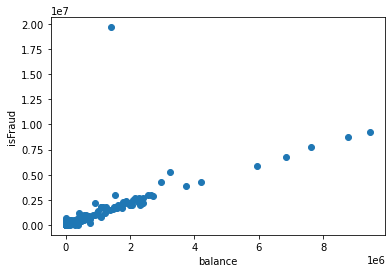

In [23]:
C = 2.0 
X =  dfInput
Y =  dfOutput
svc = svm.SVC(kernel='linear', C=1,gamma=1).fit(X, Y)

x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
h = (x_max / x_min)/100

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


plt.scatter(X.iloc[:, 0], X.iloc[:, 1], cmap=plt.cm.rainbow_r)
plt.xlabel('balance')
plt.ylabel('isFraud')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear , After Filter')
plt.show()